In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read the Dataset

df = pd.read_csv("/content/economic_index.csv")

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
df.shape

(24, 6)

In [13]:
#drop unnecessary columns

df = df.drop(columns = ['Unnamed: 0','year','month'],axis =1)


In [15]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [19]:
df.isna().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


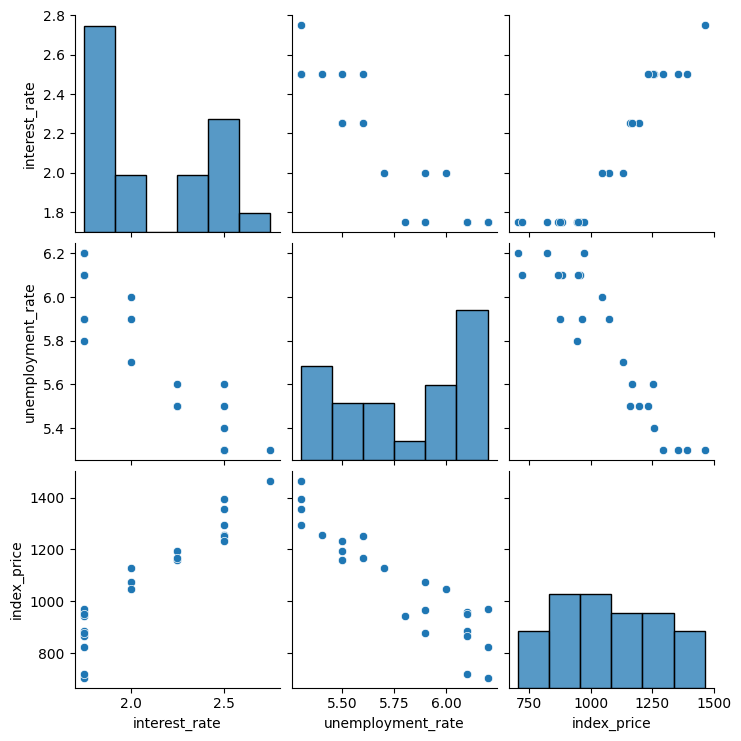

In [20]:
#lets visualize

import seaborn as sns

sns.pairplot(df)

In [22]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


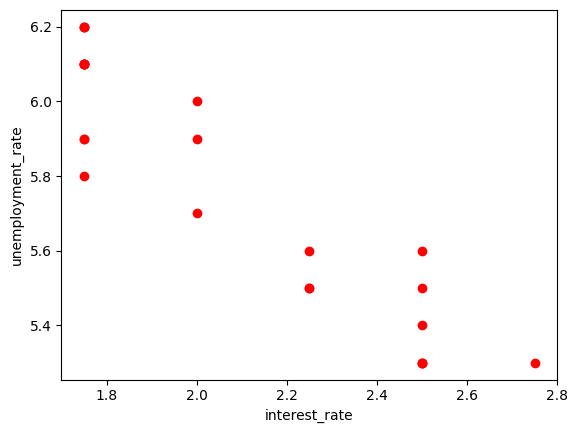

In [25]:
#visualize data points

plt.scatter(df['interest_rate'],df['unemployment_rate'],color = 'r')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')
plt.show()

In [32]:
X = df.iloc[:,:-1] #Features
Y = df.iloc[:,-1] # Target

In [34]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [35]:
Y.head()

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

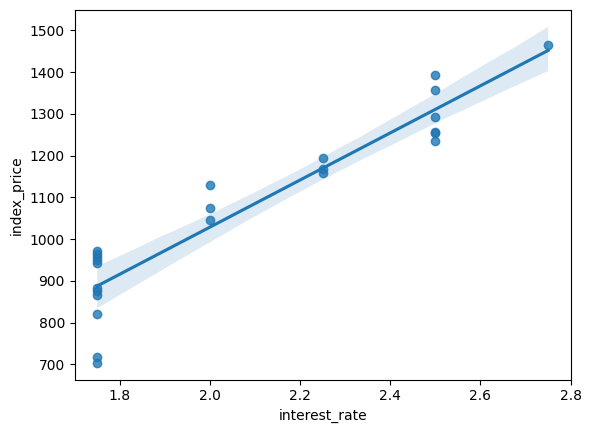

In [38]:
import seaborn as sns
sns.regplot(x='interest_rate', y='index_price', data=df)
plt.show()

In [50]:
df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

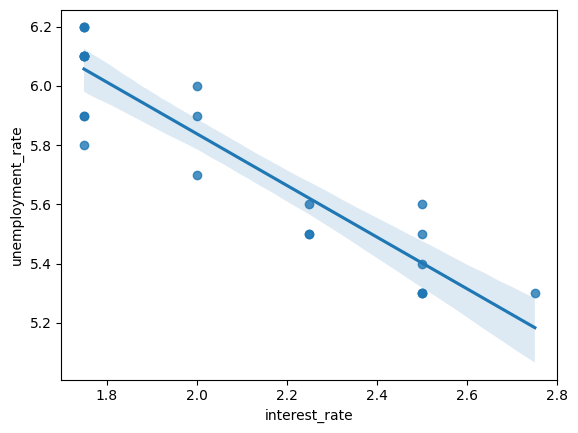

In [39]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [43]:
from sklearn.linear_model import LinearRegression
regression  = LinearRegression()

In [44]:
regression.fit(X_train,y_train)

LinearRegression()

In [56]:

print("Intercept is",regression.intercept_)

Intercept is 1053.4444444444443


In [57]:
print("Coefficient is ",regression.coef_)

Coefficient is  [  88.27275507 -116.25716066]


In [51]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)

In [53]:
np.mean(validation_score)


np.float64(-5914.828180162386)

In [47]:
y_pred = regression.predict(X_test)

In [48]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_pred)
print("MSE : ",mse)
print("MAE : " ,mae)
print("RMSE :",rmse)
print("R2 score :",score)

MSE :  5793.762887712569
MAE :  59.935781523235484
RMSE : 76.11677139574805
R2 score : 0.8278978091457145


In [54]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [55]:
model.summary()

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 23 Jun 2025   Prob (F-statistic):                       0.754
Time:                        02:20:17   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""